# **Proyecto 03 - Series de Tiempo**

**Dataset: Flujo Vehicular por Unidades de Peaje AUSA**

## **Objetivo** 

**El objetivo del proyecto es estimar la demanda de autopista Illia para el 4T de 2019, medida en cantidad de peajes abonados en efectivo, mediante modelos predictivos de series de tiempo.** Para ese fin, trabajaremos con los datos de 2017 al 2019 inclusive, para esa estación de peaje y ese medio de pago.

La estrategia consiste en evaluar el desempeño de distintos modelos mediante el RMSE. En todos los casos, hablamos de modelos univariados, dónde la única variable independiente es el tiempo, y la variable dependiente son la cantidad de pasos (cantidad de peajes).

## *Business Understanding*

Personas se trasladan por trabajo o trabajando, para hacer trámites, están en viaje de vacaciones, por estudio, para visitar amigos o familia, hacer compras, ocio, y demás. Un completo universo de individuos se traslada. Este interminable e intermitente movimiento, creciente con el tiempo (me aventuro), define una característica de la modernidad. Somos cambientes y flexibles. No dormimos dónde trabajamos. No descansamos dónde vivimos. No trabajamos en un sólo lugar, ni acumulamos parientes o amistades en zonas geográficas. Las oportunidades (y la vida) están donde estan, y vamos tras ellas. 

Este sostenido incremento en la movilidad puede generar congestión. Que calles chicas requieran ser avenidas. Que avenidas acaben insuficientes, y requiramos autopistas. Todo ello, para no perecer en interminables y agotadores traslados, desde, o hacia. La demora del traslado es una de las variables que más afecta a la calidad de vida en las grandes urbes.

Nos movemos. Pero no todos por igual. Hay patrones, algunos bastante obvios. A primera hora, hacia nuestros trabajos, principalmente. Al final de la tarde, el regreso. Los fines de semana, o en temporada de verano e invierno, por ocio. Tambien viajamos por trámites, para ver profesionales de la salud, especialistas, etc. 

Cambia el costo del peaje, del estacionamiento, de la patente, de la VTV, y/o del combustible. Algunos deciden carpolling, otros deciden no subir a la autopista, o sólo para ir o volver. A veces pagamos en efectivo. Nos modernizamos y usamos abonos. Se crea nueva infraestructura (PDB). Se crean o destruyen días feriados. Equipos de fúltbol disputan partidos internacionales, o no entran en las copas (o no hay eliminatorias para seleccionados nacionales). No viajamos (o sí) si hay votación.

Necesitamos formularnos preguntas sobre escenarios futuros: 
- ¿Cómo será la demanda de uso de autopista en el futuro?
- ¿Será suficiente la infraestructura actual para contener el flujo vehícular en los próximos años?
- En base a su evolución, ceteris paribus, ¿en qué momento podría llegarse a punto de congestión?
- En caso de necesitarse, ¿es técnicamente posible modificar infraestructura de transporte, o se requerirá de alternativas vinculadas a desarrollo urbano?

## Estudios de análisis de variables que impactan en el uso de autopistas

- cuestiones climáticas
- tarifas
- demografía
- variación relativa en el costo de las propiedades (Zona Norte vs. CABA)

# **Análisis Exploratorio de Datos**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import datetime
sns.set()

from fbprophet import Prophet

In [2]:
def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12, ha = 'center', xycoords = 'data') 
    

def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12, ha ='center' , xycoords = 'data')

In [3]:
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

## *Explorando los datasets*

In [4]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [5]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [6]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Investiguemos que valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**

In [7]:
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())

['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']


In [8]:
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())

['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']


In [9]:
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())

['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']


In [10]:
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())

['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'INFRACCION'
 'T. DISCAPACIDAD']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO' 'TARJETA DISCAPACIDAD'
 'INFRACCION']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'TARJETA DISCAPACIDAD' 'EXENTO'
 'INFRACCION' 'MONEDERO' 'Otros']


**Podemos decir entonces que los años 2017, 2018 y 2019 tienen las siguientes columnas con la siguiente información:**

- **periodo**: año del dset 

- **fecha**: año dia mes

- **hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

- **hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

- **dia**: dia de la semana 

- **estacion**: Observamos que 'Dellepiane Centro' (sólo es sentido centro) y 'Dellepiane Liniers' (sólo es sentido Provinca), son unificadas en 2019. Las unificaremos para todo el dataset. Lo mismo para el cambio de nombre de la estación Alberdi (2017 y 2018) a 'Alberti' (2019), lo cuál asumimos un error en la denominación en los dataset. Dejaremos esta última. También se agrega PDB en 2019.

- **sentido**: Centro o Provincia

- **tipo_vehiculo**: Liviano o Pesado

- **forma_pago**: Hay varias y varian entre los años.

- **cantidad_pasos**: Cantidad de vehiculos

## Acondicionando el dataset preliminar

Vamos a iniciar contextualizando a la autopista Illia frente al resto, para el conjunto de atributos. Más adelante realizaremos el filtrado del dataset según el objetivo del proyecto. 

Vamos a concatenar los años, pasar la fecha a datetime, y unificarla con hora_fin. De esta forma, nos podemos deshacer más adelante de los atributos 'período', 'hora_inicio' y 'hora_fin'.

Finalmente, unificamos las estaciones Dellepiane para todo el período, y las formas de pago 'TARJETA DISCAPACIDAD' con 'T. DISCAPACIDAD'

In [11]:
#Unimos los 3 datasets. Podemos hacerlo asi directamente, ya que tienen las mismas columnas
dataset = pd.concat([data_2017, data_2018, data_2019])

#Nos quedamos solamente con la estación Illia; de momento dejamos todas las formas de pago Efectivo para realizar el AED
#mask = dataset.estacion=='Illia'
#dataset = dataset[mask]

#Quitamos las columnas que no vamos a utilizar
#dataset.drop(columns = ['periodo','hora_inicio'], inplace = True)

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 

#Reemplazamos categorias para homogeneizar el dataset
dataset.replace({'TARJETA DISCAPACIDAD': 'T. DISCAPACIDAD', 'Dellepiane Centro': 'Dellepiane', 
                 'Dellepiane Liniers': 'Dellepiane', 'Alberdi': 'Alberti'}, inplace=True)
dataset.head(5)

,periodo,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
0,2017,0,1,Domingo,Alberti,Centro,Liviano,NO COBRADO,25,2017-01-01 01:00:00
1,2017,0,1,Domingo,Alberti,Centro,Liviano,TELEPASE,7,2017-01-01 01:00:00
2,2017,1,2,Domingo,Alberti,Centro,Liviano,NO COBRADO,5,2017-01-01 02:00:00
3,2017,1,2,Domingo,Alberti,Centro,Liviano,EFECTIVO,2,2017-01-01 02:00:00
4,2017,1,2,Domingo,Alberti,Centro,Liviano,EFECTIVO,94,2017-01-01 02:00:00


In [12]:
dataset.shape

(3560706, 10)

El dataset contiene 3560706 registros con 10 atributos

## Flujo vehicular en contexto

Empecemos por caracterizar el flujo vehicular en las autopistas de AUSA.

### Flujo vehicular según estación, por año

In [13]:
dataset.groupby([dataset.estacion, dataset.periodo])['cantidad_pasos'].sum()#.plot(kind='pie')#.sort_values()#

estacion    periodo
Alberti     2017        5789514
            2018        5734842
            2019        5631401
Avellaneda  2017       50811590
            2018       49652369
            2019       48303625
Dellepiane  2017       30693934
            2018       29762844
            2019       29295448
Illia       2017       33570584
            2018       34490038
            2019       34155167
PDB         2019        5668376
Retiro      2017        2352828
            2018        1398682
            2019        1170450
Salguero    2017         616828
            2018         952055
            2019        1221380
Sarmiento   2017         998212
            2018        1102862
            2019        1264678
Name: cantidad_pasos, dtype: int64

Hay peajes que descienden todo el período (), mientras otros siguen el movimiento inverso (Sarmiento, Salguero). La estación Illia crece en peajes en 2018 frente a 2017, pero retrocede parcialmente en 2019. Vamos a mirar la participación de cada estación para la ventana de tres años, con especial foco en Illia

<AxesSubplot:ylabel='cantidad_pasos'>

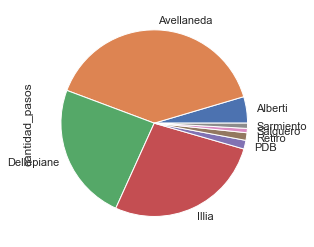

In [14]:
dataset.groupby([dataset.estacion])['cantidad_pasos'].sum().plot(figsize=(15,4), kind='pie')

Los peajes en la Illia representan poco más de un cuarto del total de los peajes de AUSA.

### Peajes según medio de pago

<AxesSubplot:xlabel='forma_pago'>

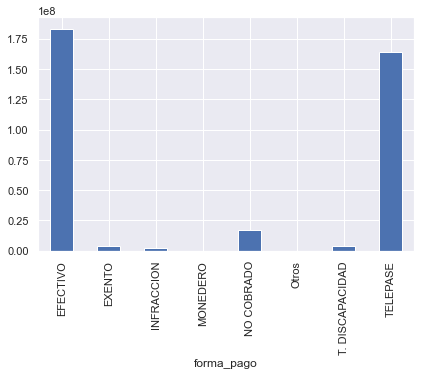

In [15]:
dataset.groupby([dataset.forma_pago])['cantidad_pasos'].sum().round(2).plot(kind='bar')

Efectivo y Telepase practicamente totalizan los pagos

### Peajes por tipo de vehículo

In [16]:
dataset.groupby([dataset.tipo_vehiculo, dataset.periodo])['cantidad_pasos'].sum()

tipo_vehiculo  periodo
Liviano        2017       113674277
               2018       112371359
               2019       112119160
Pesado         2017        11159213
               2018        10722333
               2019        14591365
Name: cantidad_pasos, dtype: int64

## Estación Illia

In [17]:
mask_Illia = dataset.estacion=='Illia'
dataset_Illia= dataset[mask_Illia]

### Pantallazo al período completo

Vamos a comenzar por descripción básica. Hacemos una vista cenital de la ventana de tiempo completa, **resampleado en días**, del total de peajes de la estación Illia.

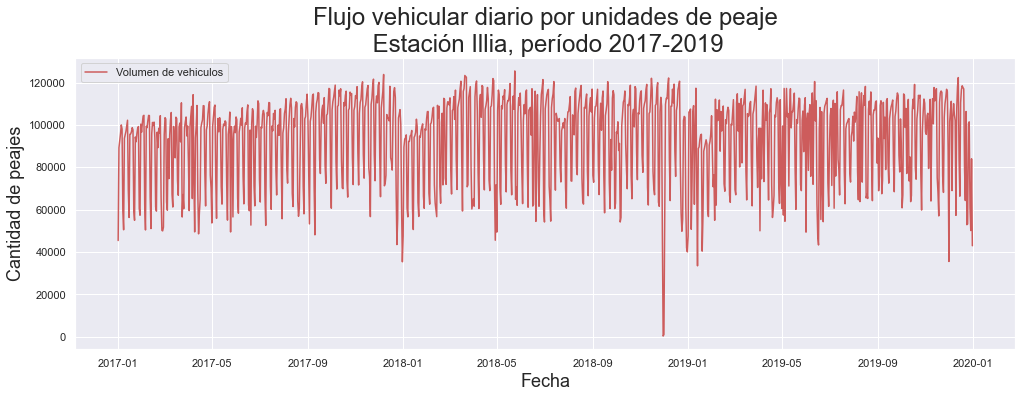

In [18]:
diario_Illia = dataset_Illia.resample('D', on = 'fecha').sum()

plt.figure(figsize = (15,5))
plt.plot(diario_Illia.index, diario_Illia.cantidad_pasos, label = 'Volumen de vehiculos', color='indianred')
plt.title('Flujo vehicular diario por unidades de peaje\n Estación Illia, período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
plt.legend()
plt.show()

La estacionalidad diaria nos dificulta la visualización. Lo **resampleo a semanal**.

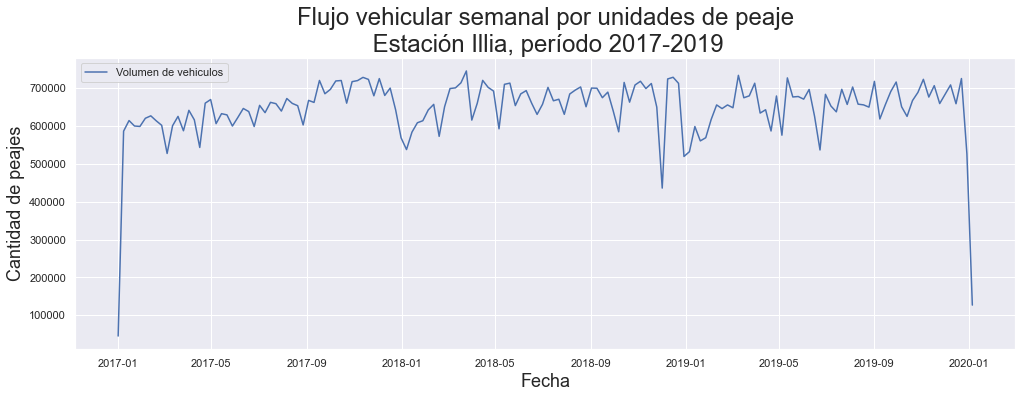

In [19]:
semanal_Illia = dataset_Illia.resample('W', on = 'fecha').sum()
plt.figure(figsize = (15,5))
plt.plot(semanal_Illia.index, semanal_Illia.cantidad_pasos, label = 'Volumen de vehiculos')
plt.title('Flujo vehicular semanal por unidades de peaje\n Estación Illia, período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
plt.legend()
plt.show()

La primera y última semana contienen uno (Domingo), y dos días (Lunes y Martes). A eso se debe fundamentalmente que sean de tan bajo 'cantidad_pases'. 

Como es de esperar, se observa una caída brusca en el flujo vehícular en el início de cada año. Luego lo analizaremos más detenidamente en el estudio de estacionalidad. Por otra parte, el año 2017 parece mostrar un crecimiento sostenido durante todo el año, mientras que 2018 y 2019 parecen con tendencia estacionaria en la media, pero con valores mucho más volátiles.

Para terminar esta parte, vamos a mirar con granularidad mensual.

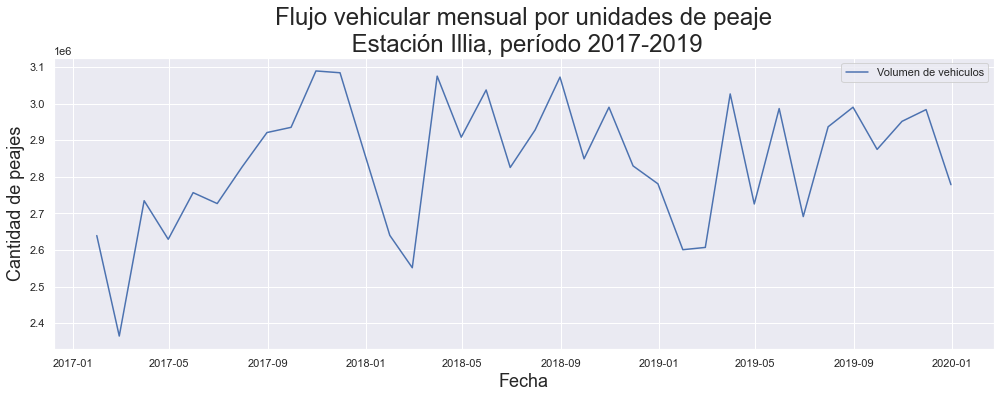

In [20]:
mensual_Illia = dataset_Illia.resample('M', on = 'fecha').sum()
plt.figure(figsize = (15,5))
plt.plot(mensual_Illia.index, mensual_Illia.cantidad_pasos, label = 'Volumen de vehiculos')
plt.title('Flujo vehicular mensual por unidades de peaje\n Estación Illia, período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
plt.legend()
plt.show()

Acá apreciamos lo que mencionamos del año 2017. Pero 2018 y 2019 parecen tener una media diferente. De hecho, 2018 parece tener tendencia negativa, mientras que en 20119 sería estacionaria. Luego lo miraremos desestacionalizado.

### Distribución mensual del flujo vehícular

Vamos a agrupar por mes para compararlos

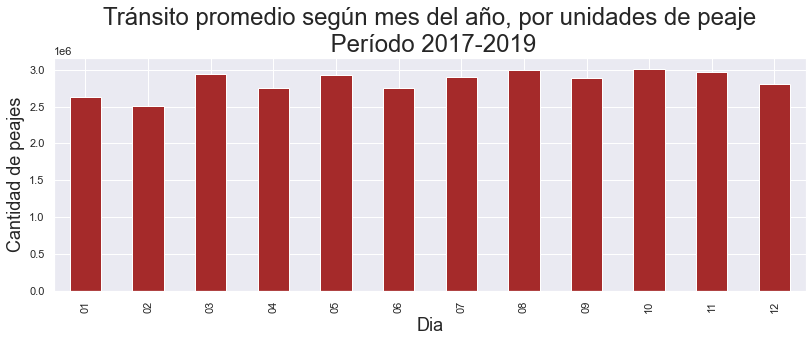

In [21]:
#creo una variable texto con el número del mes, dentro de la serie resampleada por mes.
#Tengo que ver como pasarla al nombre del mes (tip=month_name)
mensual_Illia['Mes']= mensual_Illia.index.strftime('%m')

#Agrupo x mes, y obtengo el promedio de peajes correspondiente a cada uno 
mensual_Illia_agrupado= mensual_Illia.groupby(['Mes'])['cantidad_pasos'].mean().round(0)

#Grafico con barras. Tengo que modificar la leyenda de la escala y
plt.figure(figsize = (12,4))
mensual_Illia_agrupado.plot.bar(color=['brown'], edgecolor='w')
plt.title('Tránsito promedio según mes del año, por unidades de peaje\n Período 2017-2019', fontsize=24)
plt.xlabel('Dia', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
#plt.legend()
plt.show()

A diferencia de lo que pensaba, el flujo vehicular no se desploma en verano ni en vacaciones de invierno. La diferencia entre máximo y mínimo es de sólo 1/6 (500.000 sobre 3.000.000). 

¿Hay estacionalidad anual? No podemos inferirlo de este gráfico. Debemos graficar los meses desagregados por año, y compararlos. Esto lo analizaremos en el estudio de autocorrelación.


### Distribución semanal del flujo vehicular

¿Que días registran el mayor flujo vehicular?, ¿cuál es el día de menor tránsito? Vamos a agrupar por día para investigar como se distribuye el flujo vehicular a lo largo de la semana.

Día
Domingo       66911.0
Lunes         94885.0
Martes       100043.0
Miércoles    103821.0
Jueves       106563.0
Viernes      105398.0
Sábado        75930.0
Name: cantidad_pasos, dtype: float64


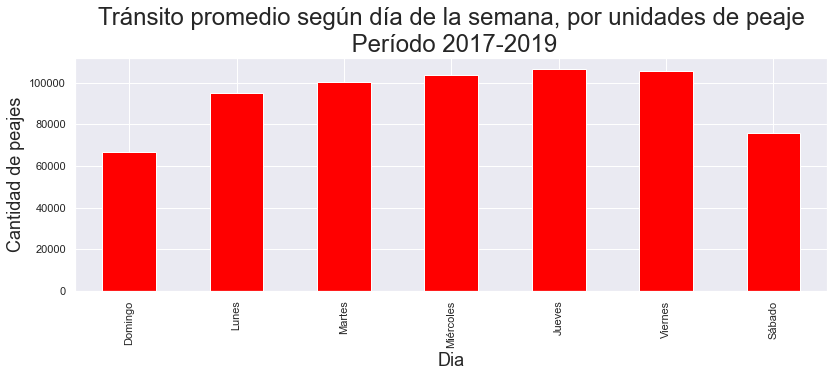

In [22]:
#import calendar
#calendar.setfirstweekday(calendar.MONDAY)

#creo una variable texto con el nombre del día, dentro de la serie resampleada por día.
#Tengo que ver como pasarla al castellano
diario_Illia ['Día'] = diario_Illia.index.day_name(locale='Spanish')

#Agrupo x dia, y obtengo el promedio de peajes correspondiente a cada uno 
diario_Illia_agrupado= diario_Illia.groupby(['Día'], sort=False)['cantidad_pasos'].mean().round(0)
print(diario_Illia_agrupado)

#Grafico con barras. Tengo que modificar la leyenda de la escala y
plt.figure(figsize = (12,4))
diario_Illia_agrupado.plot.bar(color=['red'], edgecolor='w')
plt.title('Tránsito promedio según día de la semana, por unidades de peaje\n Período 2017-2019', fontsize=24)
plt.xlabel('Dia', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
#plt.legend()
plt.show()

El tránsito crece constante desde el Lunes hasta el Jueves, el pico, con 106563 peajes díos en promedio, y luego inicia el descenso hasta el Domingo, día en que encontramos (previsiblemente) el mínimo flujo vehicular semanal, un 37% inferior respecto del máximo del Jueves.

### Distribución horaria del flujo vehicular

Nos preguntamos algo similar a lo anterior. ¿Cómo se distribuye el flujo vehicular a lo largo del día?, ¿hay picos en horarios que podríamos considerar de "ida y regreso del trabajo"?, ¿qué diferencia se registra en volumen de tránsito entre las horas de menor y mayor congestión?

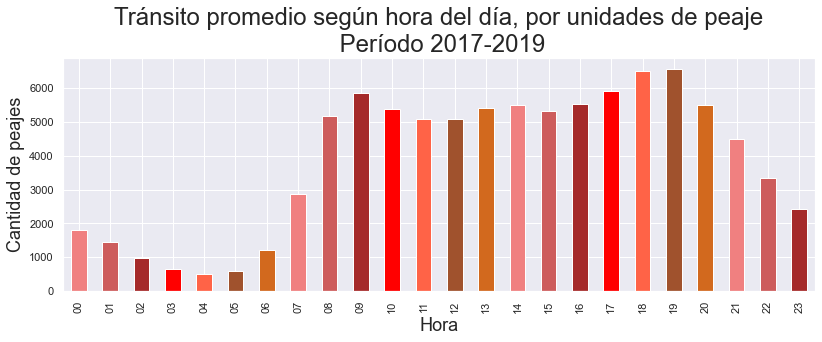

In [23]:
horaria_Illia = dataset_Illia.resample('H', on = 'fecha').sum()
horaria_Illia ['Hora'] = horaria_Illia.index.strftime('%H')
horaria_Illia_agrupado = horaria_Illia.groupby(['Hora'], sort=False)['cantidad_pasos'].mean()
#print(horaria_Illia_agrupado)

#Grafico histograma
plt.figure(figsize = (12,4))
horaria_Illia_agrupado.plot.bar(color=['lightcoral', 'indianred', 'brown', 
                                       'red', 'tomato', 'sienna', 'chocolate'], edgecolor='w')
plt.title('Tránsito promedio según hora del día, por unidades de peaje\n Período 2017-2019',
          fontsize=24)
plt.xlabel('Hora', fontsize=18)
plt.ylabel('Cantidad de peajes', fontsize=18)
#plt.ylim(400000,800000)
#plt.legend()
plt.show()

Como esperabamos, hay picos consistentes con horas de inicio y fin de jornada laboral, en torno a las 9hs y a las 19hs, respectivamente. Sin embargo, entre ellas, no hay un descenso marcado en el flujo vehicular. El tramo horario que va de las 8hs a las 20hs fluctúa en una banda que no perfora el 25% de diferencia respecto del máximo, ayudando a formar una suerte de "Golden Gate", semejante a una distribución bimodal. Por otra parte, la franja horaria de las 3hs a 5hs es la de menor cantidad de peajes. A "grosso modo", el horario de las 4hs representa poco menos del 8% del flujo registrado a las 19hs. 

### Análisis por sentido de circulación

**Vamos a hacer el mismo análisis, pero desagregando sentido centro y provincia. Surgen muchos interrogantes: ¿se iguala diariamente el flujo vehicular entre ambos sentidos?, ¿cómo evoluciona en el tiempo esa relación?, ¿cambia la distribución horaria del flujo vehicular según el sentido de circulación?.** 

Empecemos por mirar el flujo neto de circulación diario por sentido

In [24]:
#máscara x sentido
Illia_Centro = dataset_Illia[(dataset_Illia['sentido']=='Centro')]
Illia_Provincia = dataset_Illia[(dataset_Illia['sentido']=='Provincia')]

#Resampleamos a día
diario_Illia_Centro = Illia_Centro.resample('D', on = 'fecha').sum()
diario_Illia_Provincia = Illia_Provincia.resample('D', on = 'fecha').sum()

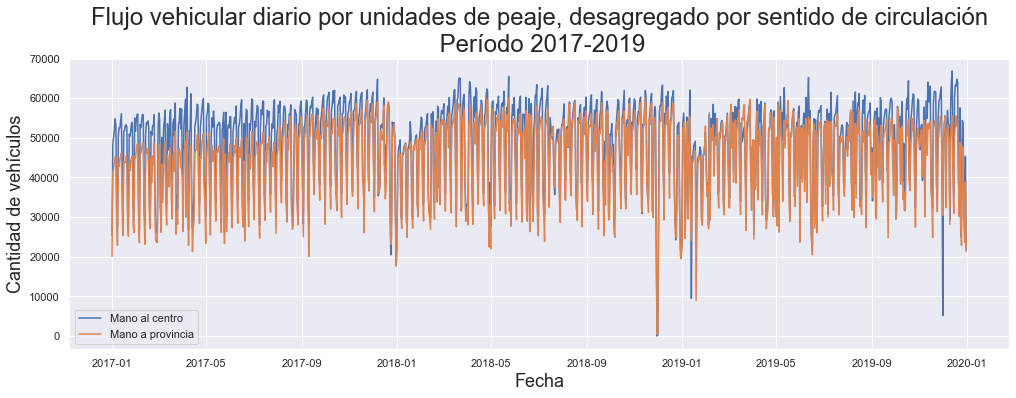

In [25]:
plt.figure(figsize = (15,5))
plt.plot(diario_Illia_Centro.index, diario_Illia_Centro.cantidad_pasos, label = 'Mano al centro')
plt.plot(diario_Illia_Provincia.index, diario_Illia_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('Flujo vehicular diario por unidades de peaje, desagregado por sentido de circulación\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

Entonces, ¿se iguala el volumen de vehículos que recorren la autopista diariamente en sentido centro y provincia? No parece ser el caso, sobre todo el primer año de análisis. Siempre (o casi) el flujo vehicular mano al centro es superior al flujo mano a provincia. Vamos a representar gráficamente la diferencia neta entre ambos sentidos de circulación, para observar más nítidamente.

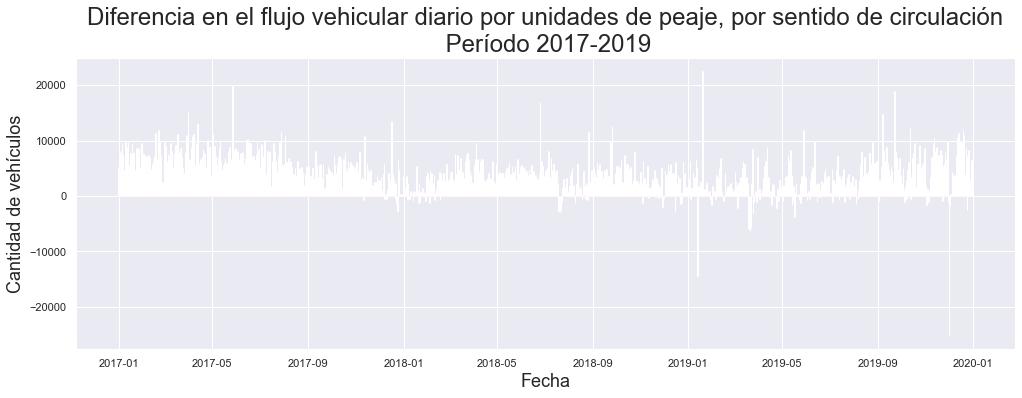

In [26]:
diferencia_diaria_Illia = diario_Illia_Centro-diario_Illia_Provincia

plt.figure(figsize = (15,5))
#diferencia_diaria_Illia.plot(kind='bar')
plt.bar(diferencia_diaria_Illia.index, diferencia_diaria_Illia.cantidad_pasos, color='red')  
#plt.plot(diario_Provincia.index, diario_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('Diferencia en el flujo vehicular diario por unidades de peaje, por sentido de circulación\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
#plt.ylim(-10000,20000)
#plt.legend()
plt.show()

Esta es la diferencia neta entre mano centro y provincia. Comprobamos lo anterior. Pero esa brecha no parece estable, lineal, sino más bien una parábola. Vamos a resamplear a mensual.

In [28]:
#Resampleamos a mes
mensual_Centro = diario_Illia_Centro.resample('M', on = 'fecha').sum()
mensual_Provincia = diario_Illia_Provincia.resample('M', on = 'fecha').sum()

KeyError: 'The grouper name fecha is not found'

In [29]:
plt.figure(figsize = (15,5))
plt.plot(mensual_Centro.index, mensual_Centro.cantidad_pasos, label = 'Mano al centro')
plt.plot(mensual_Provincia.index, mensual_Provincia.cantidad_pasos, label = 'Mano a provincia')
plt.title('Flujo vehicular mensual por unidades de peaje, desagregado por sentido de circulación\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
# plt.xlim(datetime.date(1990,1,1), datetime.date(2018,1,1))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

NameError: name 'mensual_Centro' is not defined

<Figure size 1080x360 with 0 Axes>

Vemos ambas series, resampleadas a mensual. En 2017 parece ir cerrandose conforme avanza el año. En 2018 se mantiene estable en los valores alcanzados el año anterior, y en 2019 parece cerrarse aún más en el primer semestre, pero luego vuelve a hacerse divergente. Si tuviese que intuir el motivo de esta brecha, diría que tiene que ver con el valor del tiempo (en términos microeconómicos, la "utilidad del tiempo"), y en cómo difiere éste. 

El tiempo es siempre el mismo, pero la valoración que hacemos de éste cambia. Por ejemplo, viajar en autopista al trabajo nos permite descansar más tiempo y acortar la duración del viaje. Este tiempo extra de ocio en la mañana es algo por lo que podríamos estar dispuestos a pagar, siempre dependiendo el costo del peaje. Pero no a la tarde. Ya con el día iniciado, el valor del tiempo es diferente, quizás menor, y no justifiquemos el costo del peaje por ahorrarnos unos minutos. 
Pero esta no es la única explicación. También es posible que el retorno a casa incluya realizar las compras en el camino, o realizar otras actividades, para las cuales no sea necesario tomar la autopista, o no lo justifique.

Creo que lo anterior justifica que realicemos un análisis de sensibilidad al cambio de precio del peaje (información que deberemos obtener).La hipótesis: "el viaje al trabajo" es un bien necesario, menos elástico, mientras que la vuelta (siempre asumiendo que en Capital se trabaja mientras que en sentido a provincia se vive), es un bien normal o de lujo. Usar un camino alternativo a la autopista insume naturalmente más tiempo. Pero ese tiempo es más valioso a la mañana, que para la hora del regreso. 

Vamos a graficar la diferencia neta mensual, y tratar de aproximar la brecha con una media movil, para ver si confirmamos el movimiento descrito en el primer párrafo.

In [ ]:
diferencia_mensual = mensual_Centro-mensual_Provincia

ventana = 8
diferencia_mensual_promedio = diferencia_mensual.cantidad_pasos.rolling(window=ventana, center = True).mean()
diferencia_mensual_promedio

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(diferencia_mensual.index, diferencia_mensual.cantidad_pasos, label = 'Temperatura Promedio')
plt.plot(diferencia_mensual_promedio, lw = 4, label = 'Temperatura Promedio - Rolling Window')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()

Se observa la parábola. Vamos a tener que buscar datos externos para entender este movimiento. 

### Formas de pago

El trabajo es con medio de pago en efectivo, sin embargo, vamos a analizar a todos ellos. Primero, analizemos su distribución.

In [30]:
dataset_Illia.groupby([dataset_Illia.forma_pago])['cantidad_pasos'].sum()#.plot(kind='pie')

forma_pago
EFECTIVO           47865581
EXENTO               642523
INFRACCION           340809
MONEDERO                 16
NO COBRADO          2328340
T. DISCAPACIDAD      512442
TELEPASE           50526078
Name: cantidad_pasos, dtype: int64

Como en el analisis del total de estaciones, prevalecen los pagos en efectivo y Telepase. Vamos a mirarlo desagregado por sentido

In [31]:
dataset_Illia.groupby([dataset_Illia.forma_pago, dataset_Illia.sentido])['cantidad_pasos'].sum()#.plot(kind='bar')

forma_pago       sentido  
EFECTIVO         Centro       24707366
                 Provincia    23158215
EXENTO           Centro         342423
                 Provincia      300100
INFRACCION       Centro         185012
                 Provincia      155797
MONEDERO         Centro              8
                 Provincia           8
NO COBRADO       Centro        1279681
                 Provincia     1048659
T. DISCAPACIDAD  Centro         264638
                 Provincia      247804
TELEPASE         Centro       26426589
                 Provincia    24099489
Name: cantidad_pasos, dtype: int64

Para todo medio de pago (aunque no represente erogación), siempre es mayor su uso mano al Centro que hacia Provincia. 

Vamos a tratar de analizar la evolución de los tipos de pago efectivo y Telepase, los dos largamente más significativos, para el periodo de estudio.

In [32]:
dataset_TLPS_EFTO = dataset_Illia[(dataset_Illia['forma_pago']== 'TELEPASE') | (dataset_Illia['forma_pago']== 'EFECTIVO')]

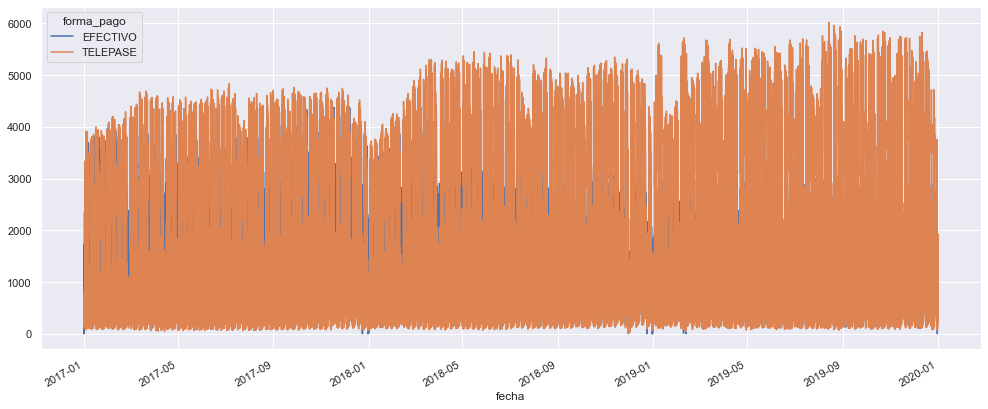

In [33]:
fig, ax = plt.subplots(figsize=(15,7))
prueba= dataset_TLPS_EFTO.groupby([dataset_TLPS_EFTO.fecha,dataset_TLPS_EFTO.forma_pago])['cantidad_pasos'].sum().unstack().plot(ax=ax, kind='line')
#plt.plot(dataset_TLPS_EFTO.fecha, dataset_TLPS_EFTO.forma_pago)
#dataset_TLPS_EFTO.plot(kind='line')
#prueba.resample('M', on='fecha').sum()

plt.figure(figsize = (15,5))
plt.plot(dataset_NO_COBRADO.index, dataset_NO_COBRADO.cantidad_pasos, label = 'NO COBRADO')
plt.plot(dataset_TELEPASE.index, dataset_TELEPASE.cantidad_pasos, label = 'TELEPASE')
plt.plot(dataset_EFECTIVO.index, dataset_EFECTIVO.cantidad_pasos, label = 'EFECTIVO')
plt.plot(dataset_EXENTO.index, dataset_EXENTO.cantidad_pasos, label = 'EXENTO')
plt.plot(dataset_INFRACCION.index, dataset_INFRACCION.cantidad_pasos, label = 'INFRACCION')
plt.plot(dataset_T_DISCAPACIDAD.index, dataset_T_DISCAPACIDAD.cantidad_pasos, label = 'T. DISCAPACIDAD')
#plt.xlim(datetime.date(2018,3,1), datetime.date(2018,6,1))
#plt.ylim(800000,2000000)
plt.title('Flujo vehicular mensual por unidades de peaje, desagregado por forma de pago\n Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
plt.legend()
plt.show()

De cara el proyecto, observamos que **el pago en EFECTIVO decrece desde abril-mayo de 2018**, cerca del momento en que se intersecta con el pago mediante TELEPASE. Antes de eso parece bastante estable. En relación al **TELEPASE, se mantuvo creciente durante el total de la ventana de tiempo**. ¿Razones? El **29/03/2018 se registró un incremento cercano al 14% en el valor de los peajes**. Y el pago mediante TELEPASE ofrece un 15% de descuento sobre el valor en efectivo. Es posible que el aumento de precios acelerara la conversión en el medio de pago. 

Y este descenso del medio de pago EFECTIVO, ¿se explica por un cambio en el comportamiento de vehículos liviano, pesados, o de ambos?  

data_eftv=dataset[(dataset['forma_pago']== 'EFECTIVO')]
data_eftv_livianos= data_eftv[(data_eftv['tipo_vehiculo']== 'Liviano')].resample('M', on = 'fecha').sum()
data_eftv_pesados= data_eftv[(data_eftv['tipo_vehiculo']== 'Pesado')].resample('M', on = 'fecha').sum()

plt.figure(figsize = (15,5))
plt.plot(data_eftv_livianos.index, data_eftv_livianos.cantidad_pasos, label = 'Liviano')
plt.plot(data_eftv_pesados.index, data_eftv_pesados.cantidad_pasos, label = 'Pesado')
#plt.xlim(datetime.date(2018,3,1), datetime.date(2018,6,1))
#plt.ylim(800000,2000000)
plt.title('Flujo vehicular mensual por unidades de peaje, pago en efectivo,\ndesagregado por tipo de vehículo. Período 2017-2019', fontsize=24)
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
plt.legend()
plt.show()


Vemos que al final de la ventana de tiempo, ambos tipos de vehículos han disminuido la cantidad de peajes abonados mediante efectivo. Sin embargo, y al margen del medio de pago, la participación de vehículos pesados es marginal. Esto nos lleva a la siguiente pregunta: ¿cómo se compone el flujo vehícular de la autopista? 

### Tipo de vehículo

<AxesSubplot:xlabel='tipo_vehiculo'>

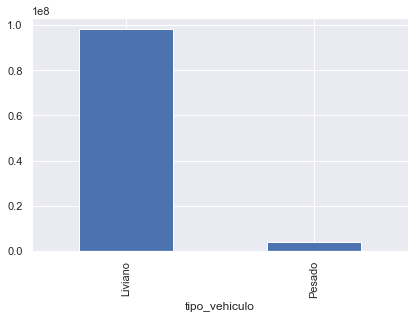

In [34]:
dataset_Illia.groupby([dataset_Illia.tipo_vehiculo])['cantidad_pasos'].sum().plot(kind='bar')
#dataset.groupby([dataset.index, dataset.tipo_vehiculo])['cantidad_pasos'].plot(x= 'tipo_vehiculo')

# Preprocesamiento

Realizaremos dos tareas:
- Verificar la existencia de datos faltantes (fecha o cantidad de pasos)
- Verificar outliers

En caso de existir alguno de los anteriores, vamos a usar la función interpolate() o un filtro Hampel.

Vamos a realizar el filtrado para pago en efectivo y quitar columnas que ya no utilizaremos

In [35]:
dataset_Illia = dataset_Illia[(dataset_Illia['forma_pago']=='EFECTIVO')]

#dataset.drop(columns = ['periodo','hora_inicio', 'hora_fin'], inplace = True)
#dataset_Illia.reset_index()

## Datos faltantes

Aquí veremos si algún valor es nulo (Nan o "_")

In [36]:
dataset_Illia.isnull().sum()

periodo           0
hora_inicio       0
hora_fin          0
dia               0
estacion          0
sentido           0
tipo_vehiculo     0
forma_pago        0
cantidad_pasos    0
fecha             0
dtype: int64

In [37]:
dataset_Illia.head()

,periodo,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos,fecha
1750,2017,0,1,Domingo,Illia,Centro,Liviano,EFECTIVO,1,2017-01-01 01:00:00
1755,2017,1,2,Domingo,Illia,Centro,Liviano,EFECTIVO,10,2017-01-01 02:00:00
1757,2017,1,2,Domingo,Illia,Centro,Liviano,EFECTIVO,783,2017-01-01 02:00:00
1761,2017,1,2,Domingo,Illia,Centro,Pesado,EFECTIVO,3,2017-01-01 02:00:00
1764,2017,2,3,Domingo,Illia,Centro,Liviano,EFECTIVO,14,2017-01-01 03:00:00


No hay valores nulos o faltantes. Nos queda ver si faltan días. Vamos a definir una variable que registre la distancia entre registros. Si hubiese algún valor >1, significaría que falta alguno.

In [38]:
dataset_Illia_diario = dataset_Illia.resample('D', on='fecha').sum()

dataset_Illia_diario['fecha_numeros']=dataset_Illia_diario.index.map(datetime.datetime.toordinal)

In [39]:
dataset_Illia_diario['date_check'] = dataset_Illia_diario.fecha_numeros.diff()
dataset_Illia_diario.date_check.value_counts()

1.0    1094
Name: date_check, dtype: int64

**No faltan registros diarios**. Vamos a mirar outliers. 

## Outliers

Vamos a graficar para identificar valores atípicos. 

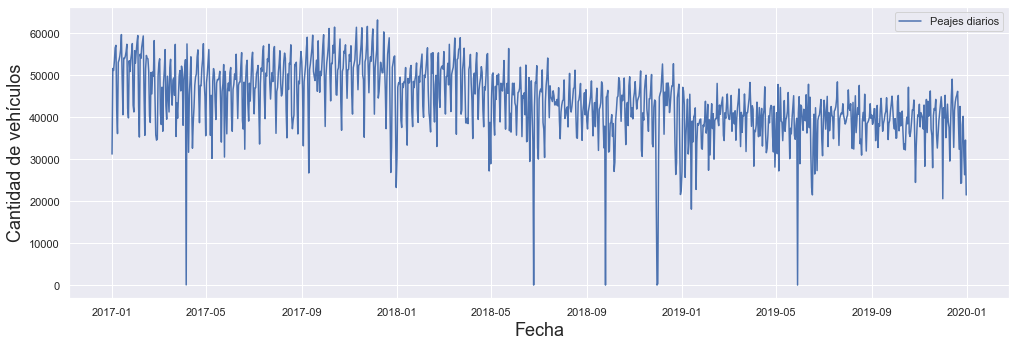

In [40]:
plt.figure(figsize = (15,5))
plt.plot(dataset_Illia_diario.index, dataset_Illia_diario.cantidad_pasos, label = 'Peajes diarios')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(2017,4,1), datetime.date(2017,4,9))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

Observamos valores cercanos a cero. Hacemos una máscara para detectarlos.

In [41]:
mask_0= dataset_Illia_diario[(dataset_Illia_diario['cantidad_pasos']<=10000)]
mask_0

,periodo,hora_inicio,hora_fin,cantidad_pasos,fecha_numeros,date_check
fecha,,,,,,
2017-04-06,6051,0,3,40,736425,1.0
2018-06-25,0,0,0,0,736870,1.0
2018-09-25,0,0,0,0,736962,1.0
2018-11-30,0,0,0,0,737028,1.0
2018-12-01,22198,249,92,350,737029,1.0
2019-05-29,0,0,0,0,737208,1.0


Acá podemos usar un filtro de Hampel, o Interpolate, o algo más. El punto no sería sólo sacar valores "extremos", sino aquellos que, sin ser aberrantes, respondan a comportamientos fuera de un límite lógico.

Voy a utilizar un filtro Hampel. Le doy una ventana lo suficientemente grande (10 días), y hasta 4 desvíos estandard, para asegurar de quitar valores que realmente resulten anómalos.

In [42]:
#import warnings
def hampel_filter_forloop(input_series, window_size, n_sigmas=4):
    
    n = len(input_series)
    new_series = input_series.copy()
    k = 1.4826 # scale factor for Gaussian distribution
    
    indices = []
    
    # possibly use np.nanmedian 
    for i in range((window_size),(n - window_size)):
        x0 = np.median(input_series[(i - window_size):(i + window_size)])
        S0 = k * np.median(np.abs(input_series[(i - window_size):(i + window_size)] - x0))
        if (np.abs(input_series[i] - x0) > n_sigmas * S0):
            new_series[i] = x0
            indices.append(i)
    
    return new_series, indices

In [43]:
res, detected_outliers = hampel_filter_forloop(dataset_Illia_diario.cantidad_pasos, 10)

In [44]:
dataset_Illia_diario['peajes_filtro_hampel'] = res

In [45]:
dataset_Illia_diario.head(10)

,periodo,hora_inicio,hora_fin,cantidad_pasos,fecha_numeros,date_check,peajes_filtro_hampel
fecha,,,,,,,
2017-01-01,465927,3033,2976,31183,736330,NaN,31183
2017-01-02,637372,3709,3713,51568,736331,1.0,51568
2017-01-03,619219,3602,3573,51093,736332,1.0,51093
2017-01-04,647457,3828,3909,53332,736333,1.0,53332
2017-01-05,641406,3790,3820,56486,736334,1.0,56486
2017-01-06,655525,3821,3858,57081,736335,1.0,57081
2017-01-07,621236,3650,3694,41587,736336,1.0,41587
2017-01-08,572828,3405,3449,36065,736337,1.0,36065
2017-01-09,643423,3802,3809,53036,736338,1.0,53036


Vamos a graficar ambas series para compararlas

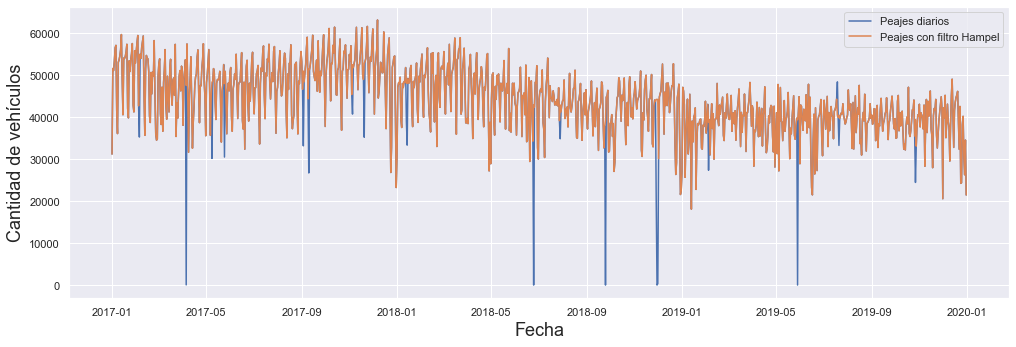

In [46]:
plt.figure(figsize = (15,5))
plt.plot(dataset_Illia_diario.index, dataset_Illia_diario.cantidad_pasos, label = 'Peajes diarios')
plt.plot(dataset_Illia_diario.index, dataset_Illia_diario.peajes_filtro_hampel, label = 'Peajes con filtro Hampel')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(2017,4,1), datetime.date(2017,4,9))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

Vemos que el filtro elimina los outliers detectados anteriormente. Adicionalmente, quita otros trece valores que no pasan el filtro.

# Autocorrelación y Autocorrelación Parcial

La predicción en series temporales implica asumir que, en gran medida, el futuro se comportará como el pasado. Una forma de observar en que grado esto es cierto, es observando la autocorrelación, y la autocorrelación parcial. La autocorrelación, como se desprende del nombre, es la correlación de los valores de la serie con los valores pasados adoptados por la misma serie. Es, además, útil para detectar patrones de estacionalidad, fundamental a la hora del modelado.

El análisis realizado hasta ahora arroja evidencia de estacionalidad múltiple,que no todos los modelos son eficientes al modelar. Podemos, por ejemplo, incrementar granularidad, de modo de sólo tener por delante una clase de estacionalidad, pero el trade-off significa sacrificar cantidad de datos y probablemente tener underfitting. Por otro lado, podemos buscar modelos que se desempeñen mejor con estacionalidad compleja 

Dejamos para el proyecto 4 la prueba con redes neuronales (RNN y LSTM), y la posibilidad de trabajar con modelos de mejor desempeño para multiple estacionalidad, como por ejemplo MEE con spline para series diarias, modelos de suavizados exponencial parsimoniosos, y los modelos de espacio de estado de innovaciones para patrones estacionales complejos (Blaconá & Andreozzi, 2013).

Vamos a analizar autocorrelación con la función de statsmodels, con distintos resampleo. 

## Diario

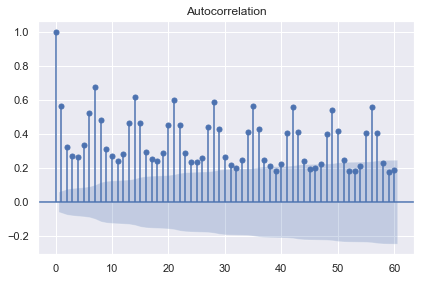

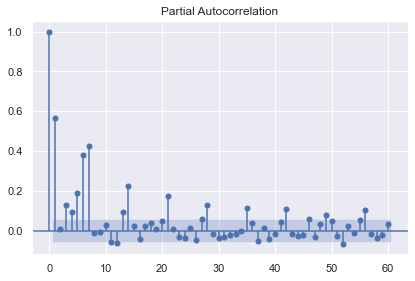

In [75]:
#importamos acf (autocorrelation function)
#from statsmodels.tsa.stattools import acf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(dataset_Illia_diario.peajes_filtro_hampel, lags = 6*10)
plt.show()
plot_pacf(dataset_Illia_diario.peajes_filtro_hampel, lags = 6*10)
plt.show()

#data = data.resample('M', on = 'fecha').sum()


El resultado es el esperado. La serie presenta estacionalidad semanal, advertido por su forma sinusoidal. Es decir, hay ciclos bien claros de una semana. Cada día de la semana tiene su correlato en el mismo día pero de las otras. 

El correlograma muestra nítidamente el ciclo semanal. La autocorrelación se mantiene positiva, indicando un proceso autorregresivo de orden 2, según la autocorrelación parcial. Vamos a repetir con resampleo mensual.

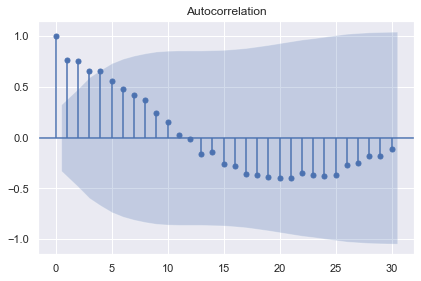

C:\Users\BagattinMarciano\miniconda3\envs\prophet\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


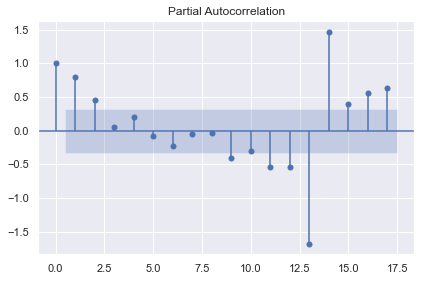

In [78]:
dataset_Illia_mensual = dataset_Illia_diario.resample('M').sum()

plot_acf(dataset_Illia_mensual.peajes_filtro_hampel, lags = 30)
plt.show()
plot_pacf(dataset_Illia_mensual.peajes_filtro_hampel, lags = 17)
plt.show()

Con Pandas

C:\Users\BagattinMarciano\miniconda3\envs\prophet\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


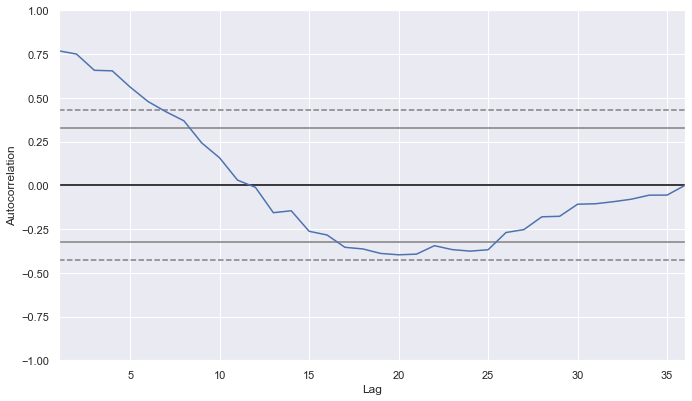

In [94]:
from pandas import datetime
from pandas.plotting import autocorrelation_plot
plt.rcParams['figure.figsize'] = [10,6]
autocorrelation_plot(dataset_Illia_mensual.peajes_filtro_hampel)
plt.grid()
plt.show()

Vemos que para 

# **Tendencia, estacionalidad y ruido**

## Tendencia: media movil

In [ ]:
ventana = int(365)
tendencia_mm_365 = data_illi_efctv_diario.cantidad_pasos.rolling(window=ventana, center = True).mean()
tendencia_mm_365

In [ ]:
plt.figure(figsize = (15,5))
plt.plot(data_illi_efctv_diario.index, data_illi_efctv_diario.cantidad_pasos, label = 'Peajes diarios')
plt.plot(tendencia_mm_365, lw = 4, label = 'Peajes diarios - Rolling Window un año')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel('Cantidad de vehículos', fontsize=18)
#plt.xlim(datetime.date(2017,4,1), datetime.date(2017,4,9))
#plt.ylim(20000,70000)
plt.legend()
plt.show()

## Tendencia: regresión lineal


Necesitamos pasar las fechas a formato numérico. Luego ajustamos la serie a una regresión lineal. Entendemos que el alcance del método es limitado, pero adecuado en nuestro caso. Ya observamos que la evolución del pago en efectivo en la Illia registra un descenso que una regresión lineal parece ajustar adecuadamente, al menos desde que inicia su descenso dede abril 2018.

In [ ]:
#creo que ya realicé el pase de fechas a números cuando verifiqué outliers

In [ ]:
#acá importamos el método de la regresión lineal. Tengo que reemplazar el argumento
#from sklearn.linear_model import LinearRegression
#lr = LinearRegression()
#lr.fit(data_illi_efctv_diario.fecha_numeros.values.reshape(-1, 1), data_illi_efctv_diario.cantidad_pasos)

# Componentes de la serie con Statsmodels

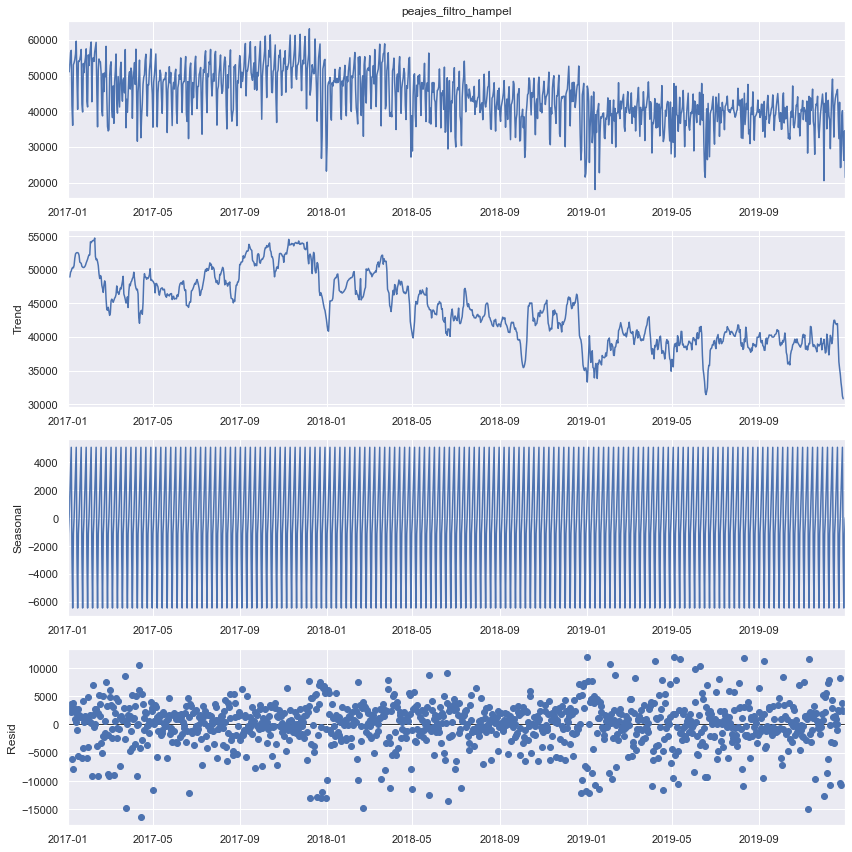

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize'] = [12,12]

#para Seasonal decomposition using moving averages.
result = seasonal_decompose(dataset_Illia_diario.peajes_filtro_hampel, model='additive')
result.plot()
plt.show()

In [82]:
result.trend

fecha
2017-01-01             NaN
2017-01-02             NaN
2017-01-03             NaN
2017-01-04    48904.285714
2017-01-05    49601.714286
                  ...     
2019-12-27    31197.428571
2019-12-28    30801.285714
2019-12-29             NaN
2019-12-30             NaN
2019-12-31             NaN
Freq: D, Name: trend, Length: 1095, dtype: float64

In [83]:
result.seasonal

fecha
2017-01-01   -6437.667671
2017-01-02   -1104.184722
2017-01-03      27.480716
2017-01-04    1740.039348
2017-01-05    3198.170300
                 ...     
2019-12-27    5084.779274
2019-12-28   -2508.617246
2019-12-29   -6437.667671
2019-12-30   -1104.184722
2019-12-31      27.480716
Freq: D, Name: seasonal, Length: 1095, dtype: float64

In [86]:
result.resid

fecha
2017-01-01            NaN
2017-01-02            NaN
2017-01-03            NaN
2017-01-04    2687.674938
2017-01-05    3686.115414
                 ...     
2019-12-27    3899.792154
2019-12-28    2388.331531
2019-12-29            NaN
2019-12-30            NaN
2019-12-31            NaN
Freq: D, Name: resid, Length: 1095, dtype: float64

C:\Users\BagattinMarciano\miniconda3\envs\prophet\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='resid', ylabel='Density'>

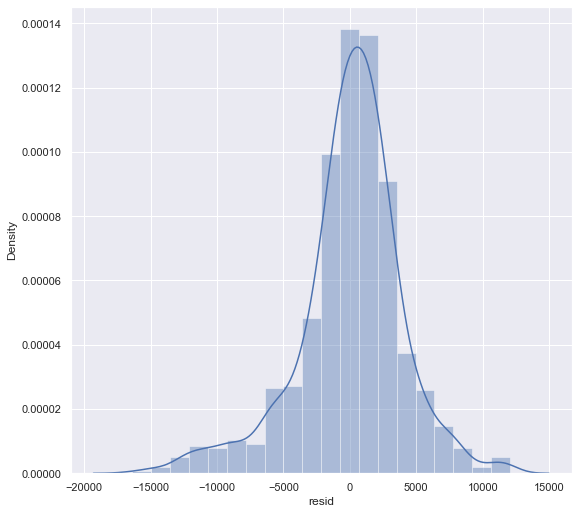

In [87]:
plt.figure(figsize=(8,8))
sns.distplot(result.resid, bins = 20)

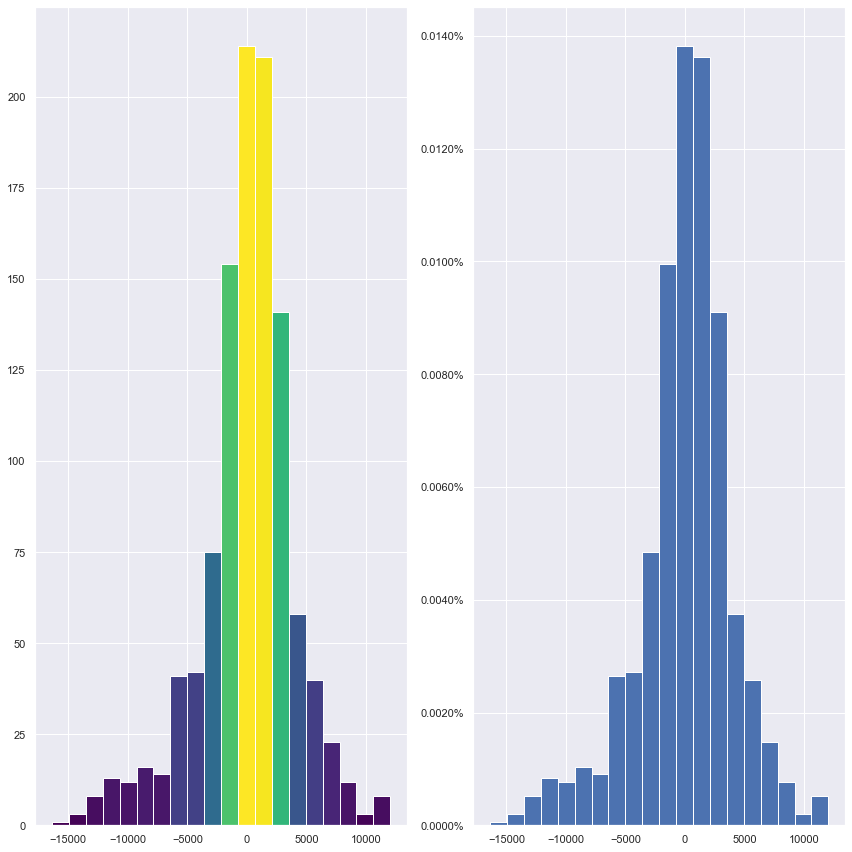

In [88]:
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(1, 2, tight_layout=True)

x = result.resid

#N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(x, bins=20)

#We'll color code by height, but you could use any scalar
fracs = N / N.max()

#we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

#Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

#We can also normalize our inputs by the total number of counts
axs[1].hist(x, bins=20, density=True)

axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [ ]:
dataset['ds']= dataset['fecha']
dataset['y']= dataset['cantidad_pasos']

In [ ]:
mask1= dataset.drop(columns=['hora_fin', 'dia', 'estacion', 'sentido', 'tipo_vehiculo', 'forma_pago', 'cantidad_pasos', 'fecha'])

In [ ]:
m = Prophet()
m.fit(mask1)

In [ ]:
future= m.make_future_dataframe(periods=365)
future.tail()

In [ ]:
forecast= m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
fig2 = m.plot_components(forecast)

# Train-Test Split 

In [ ]:
df_train = df[df['datetime']<=datetime.date(2016,12,31)]  
df_test = df[df['datetime']>datetime.date(2016,12,31)]

In [ ]:
df_train 

# **Forecasting benchmark**

## El modelo lineal

## Evaluación

# **Modelos para Forecast**

## Holt Winters

- El modelo Holt-Winters (o suavizamiento exponencial triple) engloba varios procedimientos que conforman la base de las series temporales de suavizamiento exponencial y puede adaptarse en forma sencilla a cambios, tendencias y patrones estacionales.
- No funciona correctamente para el pronóstico de series de tiempo que no presenten patrones de variación más o menos regulares a lo largo de los meses del año. 
- Una ventaja importante de los modelos de suavizamiento y, en particular, de Holt Winters, es que son univariados. 

- **Tiene que tener estacionalidad: pero semanal? mensual? anual?**
- **Tiene que haber tendencia: aproximar a una lineal? cuadrática?**
- **Mira 'niveles'**
**La ingesta de datos no debe tener outliers. Es por ello, que se puede tratar las series originales con un algoritmo de suavización: filtro Hampel. https://towardsdatascience.com/outlier-detection-with-hampel-filter-85ddf523c73d

class statsmodels.tsa.holtwinters.Holt(**kwargs)

## ARIMA

- ARIMA hace referencia a un modelo autorregresivo integrado de promedio móvil, que utiliza las variaciones y regresiones existentes entre los datos para determinar los patrones intrínsecos en la serie y, a partir de ellos, puede generar un pronóstico de los mismos. 
- Al igual que en el caso del modelo Holt-Winters, es un modelo univariado
- Sin embargo, a diferencia del anterior, que se basa en los valores de tendencia y estacionalidad de la serie temporal, un modelo ARIMA intenta explicar las correlaciones que existen entre los distintos puntos dentro de la propia serie

**Componentes**:
- 1. Autorregresiva (AR): asume que el valor de la serie en un determinado instante se corresponde con la combinación lineal de la función en instantes anteriores (hasta un número máximo determinado de ellos, llamado “p”), a lo que se adiciona un componente de error aleatorio. Es decir, la información presente de un evento está relacionada con los valores pasados.
- 2. Integración (I): se aplicarán sucesivas diferenciaciones en los casos en que las series muestren evidencia de no-estacionalidad.
- 3. Promedio Móvil (MA, del inglés moving average): asume que el valor observado en un instante se corresponde con un término de error aleatorio a lo que le adiciona una combinación lineal de errores aleatorios previos (hasta un número máximo de ellos, llamado “q”). 

Antes de poder usar, se debe procurar las transformaciones necesarias hasta tener una serie resulte estacionaria.  Esto significa que se requiere que las observaciones no estén correlacionadas entre sí y que tengan media igual a cero, así como que la varianza y covarianza no dependan del paso del tiempo. En consecuencia, toda componente estacional y de tendencia de nuestra serie temporal debe ser omitida y únicamente se odela el ruido aleatorio.

**Entonces, dada una serie de tiempo, hay que determinar en primer lugar si se trata de un modelo MA
o AR y luego, el orden del mismo.**
- Lo primero se resuelve mirando el ACF. Si se reduce hasta cortar el eje, es MA. El grado sería para el período en que lo corta. Si se reduce pero no lo corta, es AR. Ahí miramos el PACF, y el orden sería exactamente el que corta el eje en este gráfico.

Cuando la serie no es estacionaria en varianza (dispersión no constante en el tiempo, también denominada heteroscedasticidad), se requiere una transformación logarítmica o de Box-Cox; mientras que para eliminar la componente de tendencia (serie no estacionaria en su media) se suelen considerar las diferencias entre los valores a lo largo de la serie en lugar de la original. Si es lineal, una primera diferenciación sería sufuciente para lograr tendencia estacionaria, de modo que tendríamos una serie temporal integrada de primer orden, denominada I(1). Si se requieren "d" diferenciaciones, ya la llamaríamos L(d).

**Con todo ello, queda definido el modelo ARIMA(p,d,q).**

class statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=0, 0, 0, seasonal_order=0, 0, 0, 0, trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none')

## Evaluación

# Fuentes de información

- https://towardsdatascience.com/almost-everything-you-need-to-know-about-time-series-860241bdc578
- https://www.kaggle.com/wwymak/forecasting-with-prophet-not-complete-yet/data
- https://ri.itba.edu.ar/bitstream/handle/123456789/1230/TFI%20-%20Jose_%20Ignacio%20Lo_pez%20Sa_ez.pdf?sequence=1&isAllowed=y
- https://www.fcecon.unr.edu.ar/web-nueva/sites/default/files/u16/Decimocuartas/blacona_andreozzi_modelos_para_series_de_tiempo.pdf
- https://otexts.com/fpp2/complexseasonality.html
- https://arxiv.org/pdf/2008.12340.pdf